In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

from tensorflow import keras
 
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
 
from tensorflow.keras.preprocessing import image_dataset_from_directory
 
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [ ]:
PATH_DATASET = '/content/drive/MyDrive/new_dataset'
 
train_data_dir = os.path.join(PATH_DATASET, 'train')
test_data_dir = os.path.join(PATH_DATASET, 'test')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


In [ ]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model,load_model
conv_base =  InceptionV3(weights='imagenet',include_top=False,
                         input_shape=(300, 300, 3))
output = conv_base.layers[-1].output
output = keras.layers.Flatten()(output)
model_tl = Model(conv_base.input, output)
model_tl.trainable = False
for layer in model_tl.layers:
    layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in  
               model_tl.layers]
model_layers=pd.DataFrame(layers, columns=["Layer Type", "Layer Name", "Layer Trainable"])
print(model_layers) 


87924736/87910968 [==============================] - 2s 0us/step
                                            Layer Type  ... Layer Trainable
0    <keras.engine.input_layer.InputLayer object at...  ...           False
1    <keras.layers.convolutional.Conv2D object at 0...  ...           False
2    <keras.layers.normalization.batch_normalizatio...  ...           False
3    <keras.layers.core.activation.Activation objec...  ...           False
4    <keras.layers.convolutional.Conv2D object at 0...  ...           False
..                                                 ...  ...             ...
307  <keras.layers.merge.Concatenate object at 0x7f...  ...           False
308  <keras.layers.merge.Concatenate object at 0x7f...  ...           False
309  <keras.layers.core.activation.Activation objec...  ...           False
310  <keras.layers.merge.Concatenate object at 0x7f...  ...           False
311  <keras.layers.core.flatten.Flatten object at 0...  ...           False

[312 rows x 3 columns]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
test_size=400
batch_size=32
epochs=25
train_path='/content/drive/MyDrive/new_dataset/train'
test_path='/content/drive/MyDrive/new_dataset/test'
target_size=(300,300) #resize all images to 300x300
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,  
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range = [0.8, 1.2],
                                   fill_mode='nearest',        
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
                  train_path,
                  target_size=target_size,#  
                  batch_size=batch_size,
                  class_mode='categorical',
                  subset='training')
validation_generator = train_datagen.flow_from_directory(
                       train_path,
                       target_size=target_size,
                       batch_size=batch_size,
                       class_mode='categorical',
                       subset='validation')

Found 333 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import optimizers
# building a linear stack of layers with the sequential model
model =Sequential()
model.add(model_tl)
# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(2, activation='softmax'))
# compiling the sequential model
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam' ,
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 131072)            21802784  
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 38,580,386
Trainable params: 16,777,602
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(
          train_generator,
          steps_per_epoch=train_generator.samples//batch_size,    
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//batch_size, 
          epochs=epochs,
          verbose=1,
          shuffle=True)

Epoch 1/25
10/10 [==============================] - 115s 11s/step - loss: 25.3297 - acc: 0.6006 - val_loss: 0.6584 - val_acc: 0.9062
Epoch 2/25
10/10 [==============================] - 99s 10s/step - loss: 1.7539 - acc: 0.8818 - val_loss: 1.4865 - val_acc: 0.9062
Epoch 3/25
10/10 [==============================] - 99s 10s/step - loss: 1.4664 - acc: 0.9137 - val_loss: 2.3789 - val_acc: 0.7500
Epoch 4/25
10/10 [==============================] - 99s 10s/step - loss: 0.2376 - acc: 0.9563 - val_loss: 0.1042 - val_acc: 0.9688
Epoch 5/25
10/10 [==============================] - 100s 10s/step - loss: 0.1753 - acc: 0.9531 - val_loss: 0.1741 - val_acc: 0.9375
Epoch 6/25
10/10 [==============================] - 98s 10s/step - loss: 0.1268 - acc: 0.9681 - val_loss: 0.4250 - val_acc: 0.8906
Epoch 7/25
10/10 [==============================] - 98s 10s/step - loss: 0.0974 - acc: 0.9617 - val_loss: 0.1587 - val_acc: 0.9375
Epoch 8/25
10/10 [==============================] - 98s 10s/step - loss: 0.0724 

In [ ]:
# Model evaluation
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(validation_generator,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))
#For plotting Accuracy and Loss
def LearningCurve(history):
# summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
# summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  LearningCurve(history)
  #Save the trained model to a file 
  model_weight_file='/content/drive/MyDrive/MyCNN/esca_tl.h5'
  model.save(model_weight_file)

3/3 [==============================] - 22s 6s/step - loss: 0.0932 - acc: 0.9651
Train Accuracy: 97.97%
Validation Accuracy: 96.51%


In [ ]:
import tensorflow as tf
 
from tensorflow import keras
 
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
 
from tensorflow.keras.preprocessing import image_dataset_from_directory
 
import numpy as np
import matplotlib.pyplot as plt
import os
import time

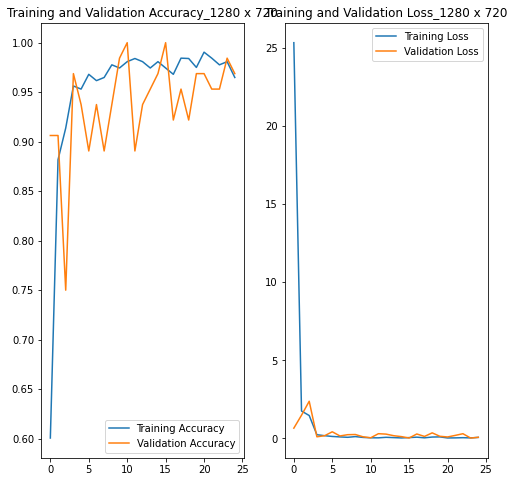

11/11 [==============================] - 87s 8s/step - loss: 0.0357 - acc: 0.9855
size of images:  1280 720
test_result:  [0.03567268326878548, 0.9855072498321533]
Time taken for transfer learning method 144.2657287120819 sec



In [ ]:
start = time.time()

img_width, img_height = 1280, 720

acc = history.history['acc']
val_acc = history.history['val_acc']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy_'+str(img_width)+' x '+str(img_height))
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss_'+str(img_width)+' x '+str(img_height))
plt.show()
 
 
 
# ***********************************************************************
# ***********************        TEST        ****************************
# ***********************************************************************
 
with tf.device('/device:GPU:0'):
 
  test_result = model.evaluate(validation_generator)
 
  
print("size of images: ", img_width,img_height)
print("test_result: ", test_result)
 
 
print ('Time taken for transfer learning method {} sec\n'.format(time.time() - start))

In [ ]:
   
PATH_MODELS = '/content/drive/MyDrive/Colab Notebooks/PAPER_1'
 
model_esca = os.path.join(PATH_MODELS, 'esca_tl_jp_v2.h5')

  
#model.save(model_esca)

Found 416 images belonging to 2 classes.
13/13 [==============================] - 100s 7s/step
[[242   6]
 [  4 164]]
              precision    recall  f1-score   support

        esca       0.98      0.98      0.98       248
     healthy       0.96      0.98      0.97       168

    accuracy                           0.98       416
   macro avg       0.97      0.98      0.98       416
weighted avg       0.98      0.98      0.98       416



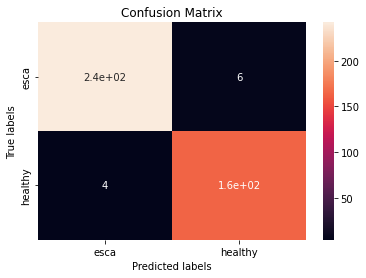

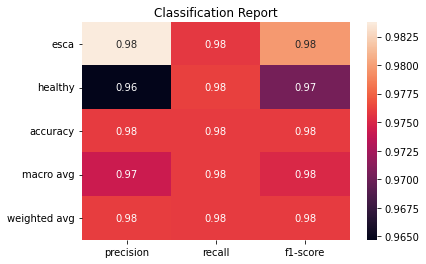

In [ ]:
import math

# We take the ceiling because we do not drop the remainder of the batch
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
test_steps = compute_steps_per_epoch(test_size)
test_generator = test_datagen.flow_from_directory(
                 test_path,
                 target_size=target_size, 
                 batch_size=batch_size,
                 class_mode=None,
                 shuffle=False)
test_generator.reset()
#Calling the saved model for making predictions
tl_img_aug_cnn = load_model(model_esca)
pred=tl_img_aug_cnn.predict(test_generator,
                            verbose=1,
                            steps=test_steps)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})
#create a function for visualizing model performance
import seaborn as sns
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T,  
                annot=True,ax=ax)
    ax.set_title('Classification Report')
    plt.show()

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
labels=['esca','healthy']
test_labels = [fn.split('/')[0] for fn in filenames]
cm=confusion_matrix(test_labels,predictions)
print(cm)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
print(cr)
PerformanceReports(cm,class_report,labels)

In [ ]:
PATH_MODELS = '/content/drive/MyDrive/Colab Notebooks/PAPER_1'
 
model_esca2 = os.path.join(PATH_MODELS, 'model_small_b32.h5')

  


Found 416 images belonging to 2 classes.
13/13 [==============================] - 108s 8s/step
[[222  26]
 [  1 167]]
              precision    recall  f1-score   support

        esca       1.00      0.90      0.94       248
     healthy       0.87      0.99      0.93       168

    accuracy                           0.94       416
   macro avg       0.93      0.94      0.93       416
weighted avg       0.94      0.94      0.94       416



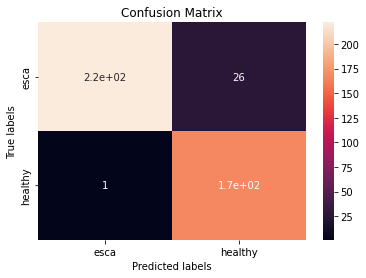

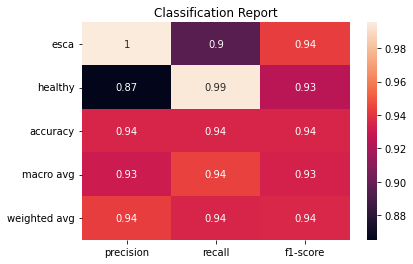

In [ ]:
#Default CNN Model

import math

# We take the ceiling because we do not drop the remainder of the batch
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
test_steps = compute_steps_per_epoch(test_size)
test_generator = test_datagen.flow_from_directory(
                 test_path,
                 target_size=target_size, 
                 batch_size=batch_size,
                 class_mode=None,
                 shuffle=False)
test_generator.reset()
#Calling the saved model for making predictions
tl_img_aug_cnn = load_model(model_esca2)
pred=tl_img_aug_cnn.predict(test_generator,
                            verbose=1,
                            steps=test_steps)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})

#create a function for visualizing model performance
import seaborn as sns
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T,  
                annot=True,ax=ax)
    ax.set_title('Classification Report')
    plt.show()

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
labels=['esca','healthy']
test_labels = [fn.split('/')[0] for fn in filenames]
cm=confusion_matrix(test_labels,predictions)
print(cm)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
print(cr)
PerformanceReports(cm,class_report,labels)

In [ ]:
PATH_MODELS = '/content/drive/MyDrive/Colab Notebooks/PAPER_1'
 
model_esca3 = os.path.join(PATH_MODELS, 'esca_svm_layer3.h5')

Found 416 images belonging to 2 classes.
13/13 [==============================] - 14s 1s/step
[[186  62]
 [  2 166]]
              precision    recall  f1-score   support

        esca       0.99      0.75      0.85       248
     healthy       0.73      0.99      0.84       168

    accuracy                           0.85       416
   macro avg       0.86      0.87      0.85       416
weighted avg       0.88      0.85      0.85       416



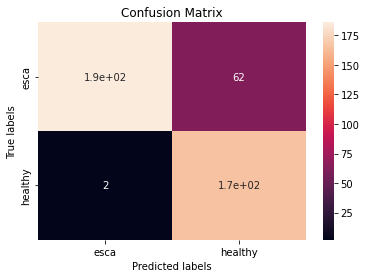

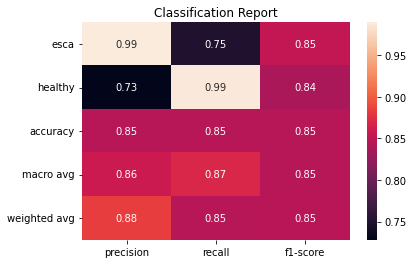

In [ ]:
#RNN + LSTM

import math
target_size=(64,64)
batch_size=32

# We take the ceiling because we do not drop the remainder of the batch
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
test_steps = compute_steps_per_epoch(test_size)
test_generator = test_datagen.flow_from_directory(
                 test_path,
                 target_size=target_size, 
                 batch_size=batch_size,
                 class_mode=None,
                 shuffle=False)
test_generator.reset()
#Calling the saved model for making predictions
tl_img_aug_cnn = load_model(model_esca3)
pred=tl_img_aug_cnn.predict(test_generator,
                            verbose=1,
                            steps=test_steps)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})

#create a function for visualizing model performance
import seaborn as sns
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T,  
                annot=True,ax=ax)
    ax.set_title('Classification Report')
    plt.show()

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
labels=['esca','healthy']
test_labels = [fn.split('/')[0] for fn in filenames]
cm=confusion_matrix(test_labels,predictions)
print(cm)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
print(cr)
PerformanceReports(cm,class_report,labels)

In [ ]:
df = pd.DataFrame(predictions)
index = df.index
num_row = len(index)
print(num_row)

416
